## Importing Libraries

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

## Importing Data

In [13]:
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
s_data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Checking for missing values

In [15]:
s_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

There is no missing value and duplicate values also. Henceb   v  no need for any data manipulation.

### Ploting the distribution of scores

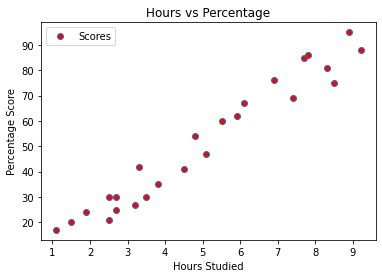

In [31]:
s_data.plot(x='Hours', y='Scores',markerfacecolor='red', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

 This shows that the number of hours studied and percentage of score are linerally dependent to each other

## Preparing the data

In [16]:
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values  

Shuffling and Creating train and test dataset using Scikit-Learn's Library

In [17]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

## Training the model

In [6]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


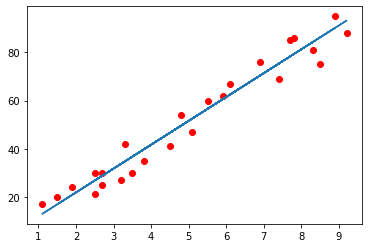

In [18]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y,color="red",label="data points")
plt.plot(X, line);
plt.show()

## Making Predictions

In [8]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [33]:
df = pd.DataFrame({'Actual': y_test})  
df 

,Actual
0,20
1,27
2,69
3,30
4,62


In [36]:
df['Predicted'] =y_pred
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [40]:
hours = [[9.25]]
pred=regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


## Predicted score if a student studies for 9.25hrs/day is 93.69